# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [9]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio
from skimage.color import rgb2gray
# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [11]:
def convert(pixel):
    return 255-pixel

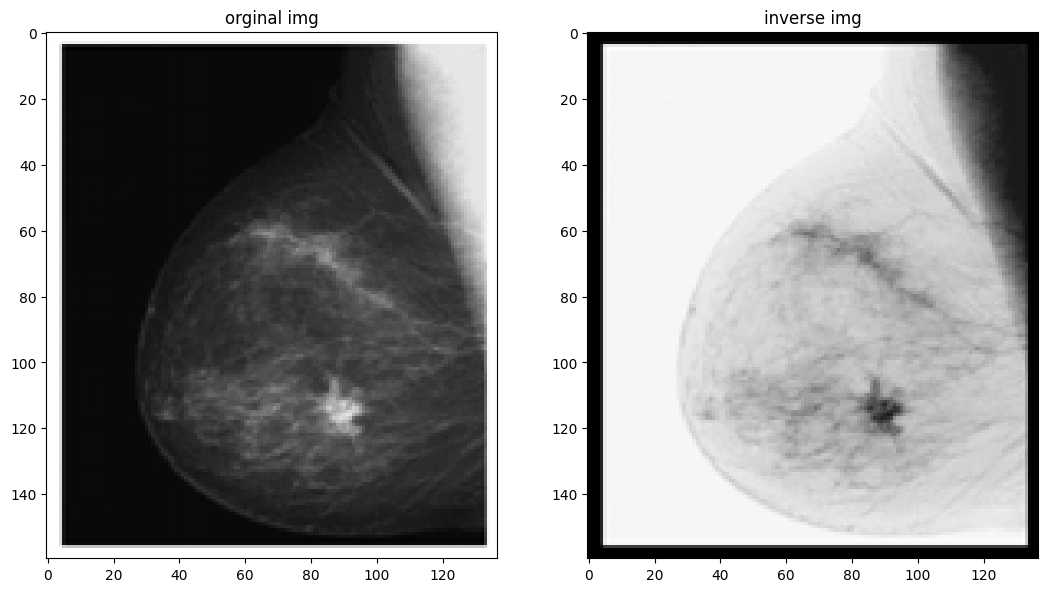

In [12]:

img=imageio.imread('./imgs/Picture1.png')
img_rgb=img[:,:,:3]
img_gray=rgb2gray(img_rgb)
inverse_img=np.zeros_like(img_gray,dtype=np.uint8)
height,width=img_gray.shape
# for i in range(height):
#     for j in range(width):
#         inverse_img[i][j] = convert(int(img_gray[i][j] * 255))

inverse_img=255-img_gray
show_images([img_gray,inverse_img],['orginal img','inverse img'])






In [13]:
def gamma_Algo(img,c,gamma):
    return c * np.power(img, gamma)


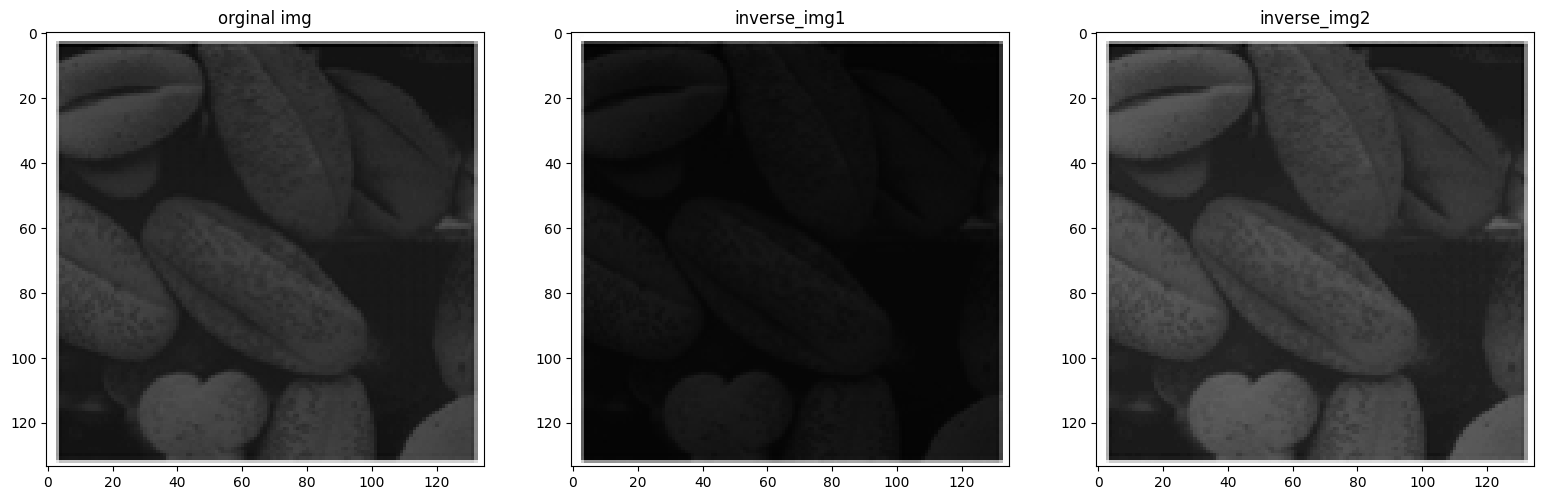

'\n3\nGamma Correction\n'

In [14]:

img=imageio.imread('./imgs/Picture2.png')
img_rgb=img[:,:,:3]
img_gray=rgb2gray(img_rgb)
inverse_img1=np.zeros_like(img_gray,dtype=np.uint8)
inverse_img2=np.zeros_like(img_gray,dtype=np.uint8)
gamma_photo1=gamma_Algo(img_gray,1,3)
inverse_img1=(gamma_photo1*255).astype(np.uint8)
gamma_photo2=gamma_Algo(img_gray,1,0.5)
inverse_img2=(gamma_photo2*255).astype(np.uint8)

#take care that as pixels between  to 1 due to func 2gray it work as expected 
# if pixels int it will work as complement of it
show_images([img_gray,inverse_img1,inverse_img2],['orginal img','inverse_img1','inverse_img2'])
'''
3
Gamma Correction
'''


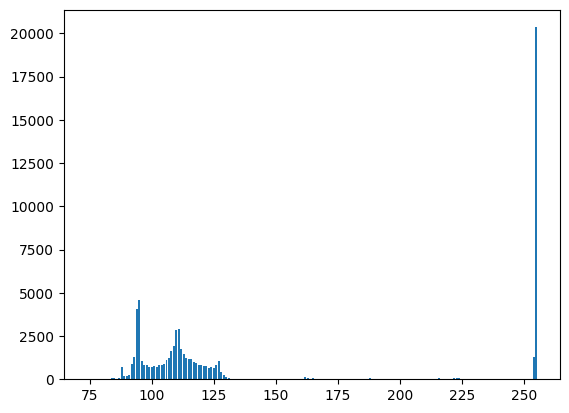

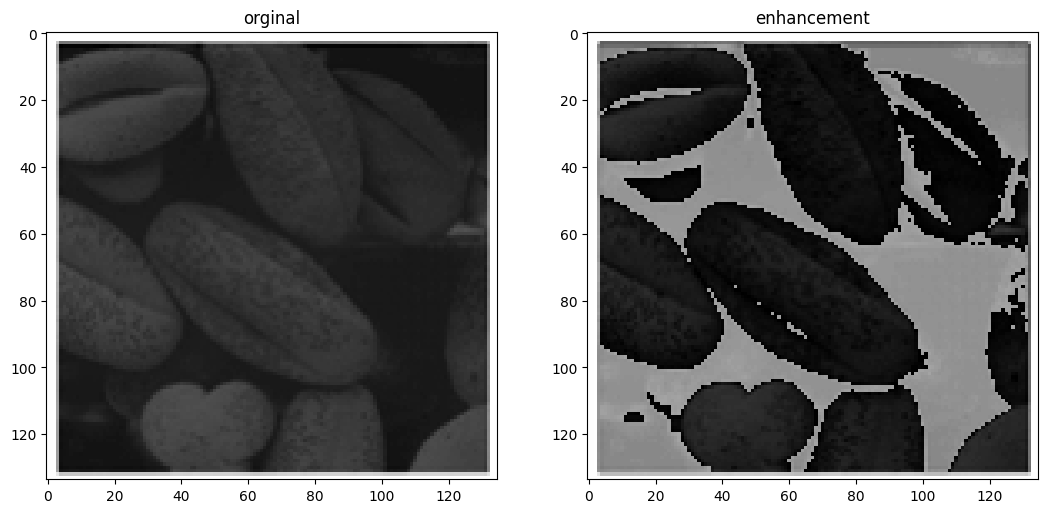

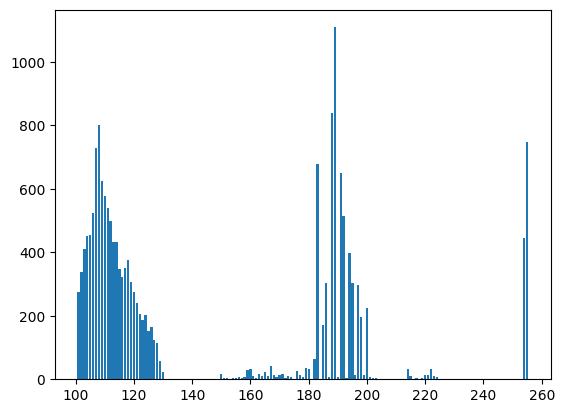

In [15]:
imgHisto=imageio.imread('./imgs/Picture2.png')
showHist(imgHisto)
img_rgb=imgHisto[:,:,:3]
img_gray=rgb2gray(img_rgb)
converted_img=np.zeros_like(img_gray,dtype=np.uint8)
img_gray_scaled = np.multiply(img_gray, 255).astype(np.uint8)
height,width=img_gray_scaled.shape
for i in range(height):
    for j in range(width):
        if(img_gray_scaled[i][j]>=0 and img_gray_scaled[i][j]<=100):
            converted_img[i][j]=int(1.5*img_gray_scaled[i][j]+50)
        else:
            converted_img[i][j]=img_gray_scaled[i][j]
show_images([img_gray_scaled,converted_img],['orginal','enhancement'])
showHist(converted_img)


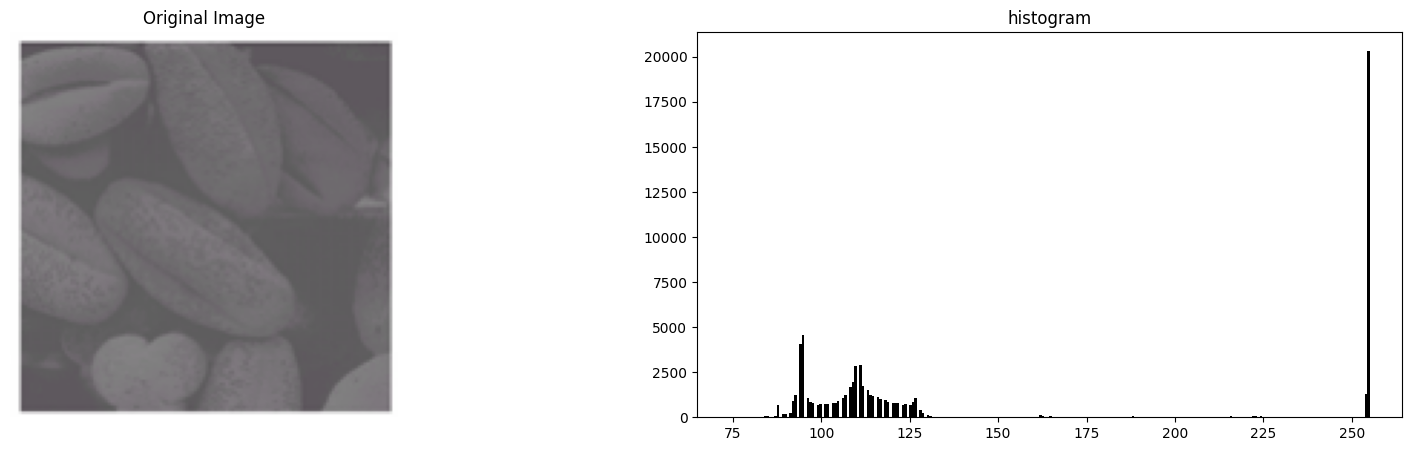

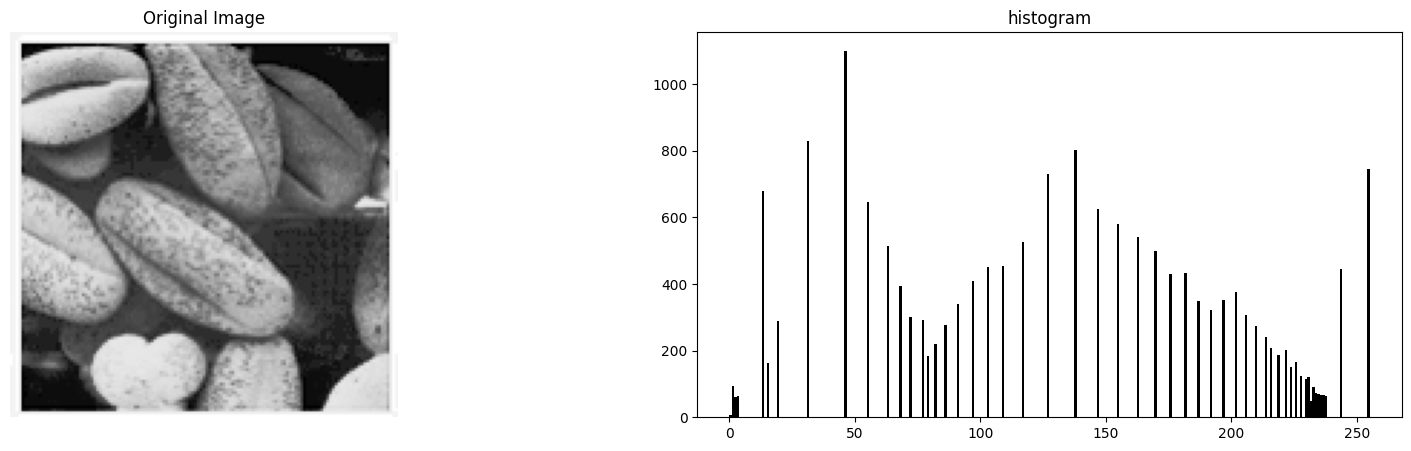

In [16]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def showWithHist(image,nbins=256):
      img= image 
      plt.figure(figsize=(20,5))
      plt.subplot(1,2,1)
      plt.title('Original Image')
      plt.axis('off')
      plt.imshow(img,cmap='gray')
      plt.subplot(1,2,2)
      plt.title('histogram')
      plt.hist(img.ravel(),bins=nbins,color='black')
      #hist, bins = exposure.histogram(img, nbins=nbins)  
      #plt.plot(bins,hist,color='black')
      
def getImageWithHist(image,nbins=256):
      img= image
      img=img[:,:,:3]
      if len(img.shape) == 3 :
        img = rgb2gray(img)
        img = (img * (nbins-1)).astype(np.uint8)
      N, M = img.shape
      G = nbins
      H = np.zeros(G, dtype=int)
      for value in img.flatten():
         H[value] += 1
      H_c = np.cumsum(H)
      T = np.round((G - 1) * H_c / (N * M))
      equalized_img = np.zeros_like(img)
      for i in range(N):
         for j in range(M):
            equalized_img[i, j] = T[img[i, j]]
      return equalized_img
   
nbins=256
img=io.imread('./imgs/Picture2.png')
showWithHist(img,nbins)
equalized_img=getImageWithHist(img,nbins)
showWithHist(equalized_img,nbins)